This machine learning project uses deep learning (keras) to predict the compressive strength of concrete from other features -- quantity of cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, fine aggregate and the age of the concrete.
Data is downloaded from https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

This notebook intends to walk people through building a deep learning model with keras step by step. Detailed comments are made : )

In [1]:
# import packages
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# load data from local
df = pd.read_csv(r'/Users/meow/Downloads/concrete.csv')
# read a few lines of the data
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
# show (rows, columns) of the table
df.shape

(1030, 9)

In [4]:
# create training and validation splits
from IPython.display import display
df_train = df.sample(frac=0.7, random_state=0) # frac = 0.7 means 70% of the data is training data and 30% of it is testing data. random state shuffles the training data to get less biased training data. can tinker with random state = 0, 1, 2 or 3 to start with. 
df_valid = df.drop(df_train.index)
display(df_train.head(10))

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
747,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,3,26.06
718,122.6,183.9,0.0,203.5,0.0,958.2,800.1,7,10.35
175,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
828,522.0,0.0,0.0,146.0,0.0,896.0,896.0,28,74.99
713,157.0,236.0,0.0,192.0,0.0,935.4,781.2,3,9.69
108,379.5,151.2,0.0,153.9,15.9,1134.3,605.0,7,47.10
403,356.0,119.0,0.0,160.0,9.0,1061.0,657.0,28,59.00
215,190.3,0.0,125.2,161.9,9.9,1088.1,802.6,14,22.72
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
27,342.0,38.0,0.0,228.0,0.0,932.0,670.0,180,52.12


In [5]:
# split features and target
# "CompressiveStrength" will be the target in this ML prediction, meaning the rest of the features are inputs
X_train = df_train.drop('CompressiveStrength', axis=1)
X_valid = df_valid.drop('CompressiveStrength', axis=1)
y_train = df_train['CompressiveStrength']
y_valid = df_valid['CompressiveStrength']

Now it's time to build the model!

In [6]:
# import keras
from tensorflow import keras
from tensorflow.keras import layers, callbacks # import callbacks in case there is overfitting

In [ ]:
#  early_stopping = callbacks.EarlyStopping(
#    min_delta=0.001, # minimium amount of change to count as an improvement
#    patience=20, # how many epochs to wait before stopping
#    restore_best_weights=True,
#)

In [7]:
# keras.Sequential creates a neural network as a stack of layers. dense layer is used here
# activation = 'relu' means the activation function is rectifier function max(0, x). activation functions are nonlinear functions that move the layers one by one.
model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(1024, activation='relu', input_shape=[8]), # input_shape = the number of input features. here it's 8
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    # the linear output layer
    layers.Dense(1),
])

In [8]:
# defining the optimizer and the loss function
# optimizer is an algorithm that adjusts the weights to minimize the loss.
# adam is a popular stochastic gradient desent (SGD) algorithm that has an adaptive learning rate that makes it suitable for most problems without parameter tunning.
# the loss function measures the disparity between the target's value and the predicted value.
# mae, mean absolute error, is a common loss function for regression problems such as what we have here.
model.compile(
    optimizer='adam',
    loss='mae',
)

In [9]:
# adding batch and epoch information
# a batch (or minibatch) is each iteration's sample of traiing data
# an epoch is a complete round of the training data
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)

In [10]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=32, titlepad=20)

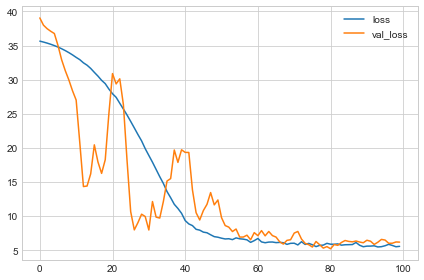

In [11]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

Wow the initial values used (well I came up with them randomly) gave such an overfitted result!
At this point I'm thinking about reducing the number of nodes (from 1024 to 512), decrease the batch and increase the epochs.

In [7]:
# keras.Sequential creates a neural network as a stack of layers. dense layer is used here
# activation = 'relu' means the activation function is rectifier function max(0, x). activation functions are nonlinear functions that move the layers one by one.
model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(512, activation='relu', input_shape=[8]), # input_shape = the number of input features. here it's 8
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    # the linear output layer
    layers.Dense(1),
])

In [8]:
# defining the optimizer and the loss function
# optimizer is an algorithm that adjusts the weights to minimize the loss.
# adam is a popular stochastic gradient desent (SGD) algorithm that has an adaptive learning rate that makes it suitable for most problems without parameter tunning.
# the loss function measures the disparity between the target's value and the predicted value.
# mae, mean absolute error, is a common loss function for regression problems such as what we have here.
model.compile(
    optimizer='adam',
    loss='mae',
)

In [9]:
# adding batch and epoch information
# a batch (or minibatch) is each iteration's sample of traiing data
# an epoch is a complete round of the training data
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=128,
    epochs=300,
    verbose=0,
)

In [10]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=32, titlepad=20)

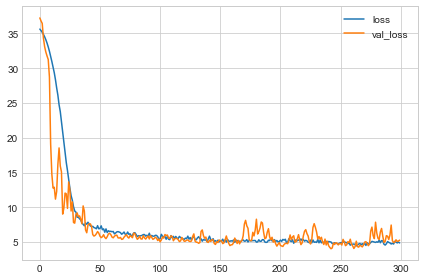

In [11]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

This one looks much better! Still noisy and overfitted especially by the end.
Using early stopping might help. Let's see.

In [17]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [18]:
# keras.Sequential creates a neural network as a stack of layers. dense layer is used here
# activation = 'relu' means the activation function is rectifier function max(0, x). activation functions are nonlinear functions that move the layers one by one.
model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(512, activation='relu', input_shape=[8]), # input_shape = the number of input features. here it's 8
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    # the linear output layer
    layers.Dense(1),
])

In [19]:
# defining the optimizer and the loss function
# optimizer is an algorithm that adjusts the weights to minimize the loss.
# adam is a popular stochastic gradient desent (SGD) algorithm that has an adaptive learning rate that makes it suitable for most problems without parameter tunning.
# the loss function measures the disparity between the target's value and the predicted value.
# mae, mean absolute error, is a common loss function for regression problems such as what we have here.
model.compile(
    optimizer='adam',
    loss='mae',
)

In [20]:
# adding batch and epoch information
# a batch (or minibatch) is each iteration's sample of traiing data
# an epoch is a complete round of the training data
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=128,
    epochs=300,
    verbose=0,
)

In [21]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=32, titlepad=20)

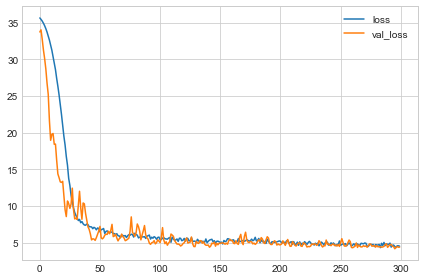

In [22]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

Looks better with early stopping! Could this be an even better model? Will work on this more and update with a different notebook : )